## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import random
from sklearn.model_selection import train_test_split

C:\Users\efein\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

Original graph: 


<AxesSubplot: xlabel='LSTAT', ylabel='target'>

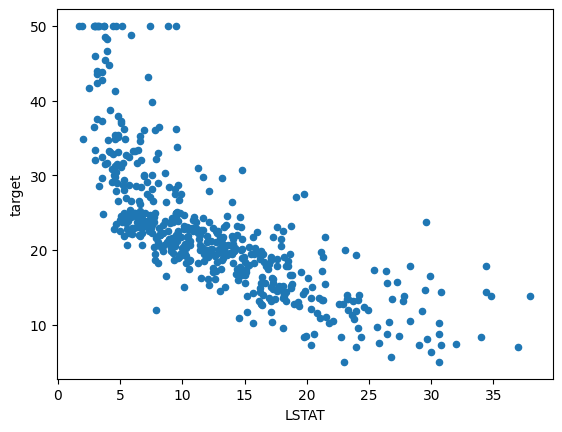

In [2]:
data = datasets.load_boston()
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=list(data['feature_names']) + ['target'])
print("Original graph: ")
housing_df.plot.scatter(x='LSTAT', y='target')

In [3]:
lr = LinearRegression()
X = housing_df[['LSTAT']]
y = housing_df['target']
lr.fit(X, y)
print("lr.coef_ = " + str(lr.coef_))
print("lr.intercept_ = " + str(lr.intercept_))
lr.coef_, lr.intercept_

lr.coef_ = [-0.95004935]
lr.intercept_ = 34.5538408793831


(array([-0.95004935]), 34.5538408793831)

Result graph: 


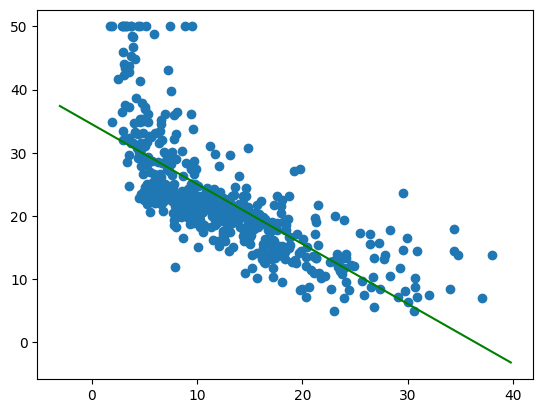

In [4]:
print("Result graph: ")
# EQUATİON: -0.95004935 * x + 34.5538408793831
f = lambda x: lr.coef_[0] * x + lr.intercept_ # equation
steps = list(np.arange(-3, 40, .25))  # x-coordinate
fitline = list(map(f, steps))  # y-coordinate
pyplot.plot(steps, fitline, color='green')  #it just plots the line
pyplot.scatter(x=X, y=y)

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [5]:
# QUESTION 2
lr = LinearRegression()
X = housing_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = housing_df['target']
lr.fit(X, y)
print(lr.score(X, y))

0.7406426641094095


In [6]:
print(lr.coef_)  #intercept = theta_zero
print(lr.intercept_)  # coef = slope

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.45948838509036


In [7]:
def mse(values, intercept, coef, target):
    total = 0
    for i in range(len(values)):
        total += (intercept + (coef.transpose() @ values[i]) - target[i]) ** 2
    return total / len(values)

In [8]:
featuresValues = data.get("data")
print("MSE: ", end="")
print(mse(featuresValues, lr.intercept_, lr.coef_, data.get("target")))

MSE: 21.89483118172921


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [9]:
# QUESTION 3
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], random_state=random.seed(), test_size=202, shuffle=True)  # %40 test , %60 train data

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("lr.score for test data: ",end="")
print(lr.score(X_test, y_test))
help(lr)

lr.score for test data: 0.7144586260048078
Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X wi

In [11]:
print("MSE for test data: ",end="")
print(mse(X_test, lr.intercept_, lr.coef_, y_test))

MSE for test data: 23.530036504201195
